In [11]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070414, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690696, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


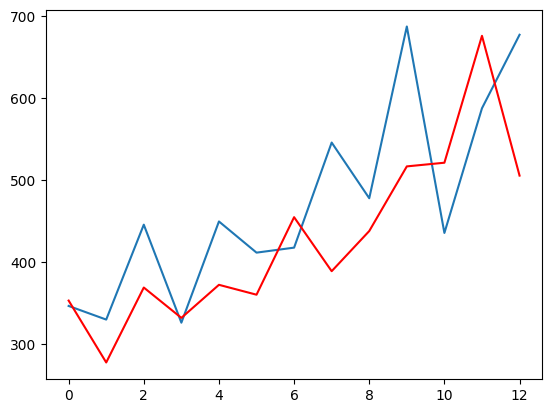

In [12]:
series = read_csv("../data/sales.csv", header=0, index_col=0, parse_dates=True, date_format="%Y-%m")

x = series.values
x = np.nan_to_num(x)

size = int(len(x) * 0.66)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print("predicted=%f, expected=%f" % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print("Test MSE: %.3f" % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()